Theory section on observables

- 22/11/22 Basics in place, including numerical examples for Ylm and Xlm cases. gluePlotly() now in place for HTML or PDF builds (although latter may need forced reexecution). May still need some work in general. 
- 24/11/22 Fixed Pandas Latex/PDF render, see https://github.com/phockett/Quantum-Metrology-with-Photoelectrons-Vol3/issues/6
  Note not working for displayed sym harm tables from symObj.displayXlm(), although are OK in HTML - likely issue with lack of return object in this case. May not want to include these in any case, but adding return obj option to PEMtk code probably best bet to fix, see phockett/PEMtk@bb51d8b/pemtk/sym/symHarm.py#L577.
- 09/02/23 All glue() outputs in this page currently broken? Related to changes to `setup_notebook.py` glue wrappers and/or build env (running in new Docker container dated 07/02/23). Weird.
- 23/03/23 Seems OK again (probably after rebuilds of container etc., plus other debugging). Also added some layout options to PAD plots, and set new image size defaults in `setup_notebook.py`.
   - Also a bit of tidy-up and playing around with first section. Still quite messy.
- 10/07/23. New version for final pass and updates.
   - Aim for general tidy-up, and finish missing parts.
   - Issues with self.padPlot() should be fixed in latest builds (as of 12/07/23)
   - Added real/complex and Legendre parts, plus some normalisation stuff.
   - MISSING: Lg eqns. General SHtools wrapper? Thought I'd done this...? CHECK SOURCE! Hmmm, see https://github.com/phockett/ePSproc/blob/1c0b8fd409648f07c85f4f20628b5ea7627e0c4e/epsproc/util/conversion.py#L304 - on the todo list.
   - Code may still need a tidy-up, but running (with figures) OK in QM3-jupyterlab-3d-120723 container.

TODO

- Add note on real harmonics? May be useful for later.
- Code cell tidy-up.
- Plotly or Panel rendering options? Currently a bit squished in HTML output (borders/subplot layout issue?).
- implement genLM() or similar functions for setup below?

(sect:theory:observables)=
# Observables: photoelectron flux in the LF and MF

The observables of interest herein - the photoelectron flux as a function of energy, ejection angle, and time (see {numref}`fig-bootstrap-concept-outline`) - can be written quite generally as expansions in radial and angular basis functions. Various types and definitions are given in this section, including worked numerical examples.

(sec:theory:sph-harm-intro)=
## Spherical harmonics

The photoelectron flux as a function of energy, ejection angle, and time, can be written generally as an expansion in spherical harmonics:

$$
\begin{align}
\bar{I}(\epsilon,t,\theta,\phi)=\sum_{L=0}^{2n}\sum_{M=-L}^{L}\bar{\beta}_{L,M}(\epsilon,t)Y_{L,M}(\theta,\phi)
\end{align}
$$ (eq:AF-PAD-general)

Here the flux in the laboratory frame ({{ LF }}) or aligned frame ({{ AF }}) is denoted $\bar{I}(\epsilon,t,\theta,\phi)$, with the bar signifying ensemble averaging, and the molecular frame flux by $I(\epsilon,t,\theta,\phi)$. Similarly, the expansion parameters $\bar{\beta}_{L,M}(\epsilon,t)$ include a bar for the LF/AF case. These observables are generally termed photoelectron angular distributions ({{ PADs }}), often with a prefix denoting the reference frame, e.g. LFPADs, MFPADs, and the associated expansion parameters $\bar{\beta}_{L,M}(\epsilon,t)$ are generically termed {{ betas }}. The polar coordinate system $(\theta,\phi)$ is referenced to
an experimentally-defined axis in the {{ LF }}/{{ AF }} case (usually defined by the laser polarization), and the molecular symmetry axis in the {{ MF }}, as illustrated in {numref}`fig-bootstrap-concept-outline`. Some arbitrary examples are given in {numref}`fig-pads-example`, which illustrates both a range of distributions of increasing complexity, and some basic code to set $\beta_{L,M}$ parameters and visualise them; the values used as tabulated in  {numref}`blm-tab`.

Numerically, there are some choices and conventions which apply to the spherical harmonics. As noted in {numref}`Sect. %s <sect:platform:pythonEcosystem>`: "spherical harmonics are defined with the usual physics conventions: orthonormalised, and including the Condon-Shortley phase. Numerically they are implemented directly or via SciPy's `sph_harm` function (see [the SciPy docs for details](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html) {cite}`SciPyDocumentation`." For further details, including conversion routines, see the {{ shtools }} documentation, and numerical examples below.

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"

*** Running: 2023-07-13 17:33:20
Working dir: /home/jovyan/QM3/doc-source/part1
Build env: notebook

* Loading packages...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 


* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.


* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


* Set Holoviews with bokeh.
Jupyter Book      : 0.15.1
External ToC      : 0.3.1
MyST-Parser       : 0.18.1
MyST-NB           : 0.17.2
Sphinx Book Theme : 1.0.1
Jupyter-Cache     : 0.6.1
NbClient          : 0.7.4


In [35]:
# Plot some distributions from specified BLMs

# Set specific LM coeffs by list with setBLMs, items are [l,m,value(s)]
# Multiple values are automatically assigned to an index 't'
from epsproc.sphCalc import setBLMs

BLM = setBLMs([[0,0,1,1,1,1,1,1],
               [1,0,0,0.5,0.8,1,0.5,0],[1,-1,0,0.5,0.8,1,0.5,0],[1,1,0,0.5,-0.5,1,0.5,0],
               [2,0,1,0.5,0,0,0.5,1],
               [4,2,0,0,0,0.5,0.8,1],[4,-2,0,0,0,0,-0.8,1]])

# Output a quick tabulation of the values with Pandas
BLM.to_pandas()

t       0    1    2    3    4    5
l m                               
0  0  1.0  1.0  1.0  1.0  1.0  1.0
1  0  0.0  0.5  0.8  1.0  0.5  0.0
  -1  0.0  0.5  0.8  1.0  0.5  0.0
   1  0.0  0.5 -0.5  1.0  0.5  0.0
2  0  1.0  0.5  0.0  0.0  0.5  1.0
4  2  0.0  0.0  0.0  0.5  0.8  1.0
  -2  0.0  0.0  0.0  0.0 -0.8  1.0

In [36]:
# Note also that the Xarray contains metadata (attributes) on type and normalisation
# This uses the SHtools format specification.

# Display full Xarray, including metadata 
BLM

<xarray.DataArray 'BLM' (BLM: 7, t: 6)>
array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0. ,  0.5,  0.8,  1. ,  0.5,  0. ],
       [ 0. ,  0.5,  0.8,  1. ,  0.5,  0. ],
       [ 0. ,  0.5, -0.5,  1. ,  0.5,  0. ],
       [ 1. ,  0.5,  0. ,  0. ,  0.5,  1. ],
       [ 0. ,  0. ,  0. ,  0.5,  0.8,  1. ],
       [ 0. ,  0. ,  0. ,  0. , -0.8,  1. ]])
Coordinates:
  * BLM      (BLM) MultiIndex
  - l        (BLM) int64 0 1 1 1 2 4 4
  - m        (BLM) int64 0 0 -1 1 0 2 -2
  * t        (t) int64 0 1 2 3 4 5
Attributes:
    dataType:   BLM
    long_name:  Beta parameters
    units:      arb
    harmonics:  {'dtype': 'Complex harmonics', 'kind': 'complex', 'normType':...

In [37]:
# Show harmonics info only
BLM.attrs['harmonics']

{'dtype': 'Complex harmonics',
 'kind': 'complex',
 'normType': 'ortho',
 'csPhase': True}

In [ ]:
# Plot some PADs from BLMs
# Set the backend to 'pl' for an interactive surface plot with Plotly

# Explict row,column layout setting for figure
rc = [2,3]  

# Compute expansions from BLM parameters and return figure objext
dataPlot, figObj = ep.sphFromBLMPlot(BLM, facetDim='t', backend = plotBackend, rc=rc, plotFlag=True);

In [ ]:
# Pass figure for Jupyter Book Glue 
# This will display only in notebook, or format with caption for HTML & PDF output.
glue("padExamplePlot", figObj[0])

```{glue:figure} padExamplePlot
---
name: "fig-pads-example"
---
Examples of angular distributions (expansions in spherical harmonics $Y_{L,M}$), for a range of cases indexed by $t$. Note that up-down asymmetry is associated with odd-$l$ contributions (e.g. $t=1,2$), breaking of cylindrical symmetry with $m\neq0$ terms (all $t>0$), and asymmetries in the (x,y) plane (skew/directionality) with different $\pm m$ terms (magnitude or phase, e.g. $t=2,3,4$). Higher-order $L,M$ terms have more nodes, and lead to more complex angular structures, as shown in the lower row ($t=3,4,5$).
```

In [ ]:
# Example using data class (see setup in init script)
data = pemtkFit()

BLM = setBLMs([[0,0,1,1,1,1],[1,0,0,0.5,0.8,1],[2,0,1,0.5,0,0],
               [4,2,0,0,0,0.5],[4,-2,0,0,0,0.5]])

data.setData('BLMtest', BLM)
# data.padPlot(keys = 'BLMtest', dataType='AFBLM', Etype='t', facetDims=['t'], backend=plotBackend, plotFlag=False, returnFlag=True)  # Working
data.padPlot(keys = 'BLMtest', dataType='AFBLM', Etype='t', backend=plotBackend)  # OK July 2023 builds.

# And GLUE for display later with caption
# figObj = data.data['BLMtest']['plots']['AFBLM']['polar'][0]
# glue("padExamplePlot2", figObj)

In [ ]:
# Some methods for tabulating the values for display

# *** ePSproc tabulateLM function, but currently 1D only
# from epsproc.sphFuncs.sphConv import tabulateLM
# dataPD = tabulateLM(BLM.unstack())

# *** General case - for any Xarray, use "multiDimXrToPD" function
# from epsproc.util import multiDimXrToPD
# dataPD, _ = multiDimXrToPD(BLM, colDims='t')

# *** Use Xarray "to_pandas()" class method, for 1D or 2D arrays only
dataPD = BLM.to_pandas()

# Glue for later use
glue("blm-tab", BLM.to_pandas())

```{glue:figure} blm-tab
:name: "blm-tab"

Values used for the plots in {numref}`fig-pads-example`.
```

In general, the spherical harmonic rank and order $(L,M)$ of Eq. {eq}`eq:AF-PAD-general` are constrained by experimental factors in the {{ LF }} or {{ AF }}, and $n$ is effectively limited by the molecular alignment (which is correlated with the photon-order for gas phase experiments, or conservation of angular momentum in the {{ LF }} more generally {cite}`Yang1948`), but in the {{ MF }} is defined by the maximum continuum angular momentum $n=l_{max}$ imparted by the scattering event {cite}`Dill1976` (note lower-case $l$ here refers specifically to the continuum photoelectron wavefunction, see Eq. {eq}`eq:elwf`).

For basic cases these limits may be low: for instance, a simple 1-photon photoionization event ($n=1$) from an isotropic ensemble (zero net ensemble angular momentum) defines $L_{max}=2$; for cylindrically symmetric cases (i.e. $D_{\infty h}$ symmetry) $M=0$ only. For {{ MF }} cases, $l_{max}=4$ is often given as a reasonable rule-of-thumb for the continuum - hence $L_{max}=8$ - although in practice higher-$l$ may be populated. Some realistic example cases are discussed later ({ref}`Part II <chpt:extracting-matrix-elements-overview>`), see also ref. {cite}`hockett2018QMP1` for more discussion and complex examples.

In general, these observables may also be dependent on various other parameters; in Eq. {eq}`eq:AF-PAD-general` two such parameters, $(\epsilon,t)$, are included, as the usual variables of interest. Usually $\epsilon$ denotes the photoelectron energy, and $t$ is used in the case of time-dependent (usually pump-probe) measurements. As discussed in {numref}`Sect. %s <sec:dynamics-intro>`, the origin of such dependencies may be complicated but, in general, the associated photoionization matrix elements are energy-dependent, and time-dependence may also appear for a number of intrinsic or extrinsic (experimental) reasons, e.g. electronic or nuclear dynamics, rotational (alignment) dynamics, electric field dynamics etc. In many cases only one particular aspect may be of interest, so $t$ can be used as a generic label to index changes as per {numref}`fig-pads-example`.

(sec:theory:sym-harm-into)=
## Symmetrized harmonics

Symmetrized (or generalised) harmonics, which essentially provide correctly symmetrized expansions of spherical harmonics ($Y_{LM}$) functions for a given irreducible representation, $\Gamma$, of the molecular point-group can be defined by linear combinations of spherical harmonics {cite}`Altmann1963a,Altmann1965,Chandra1987`:

$$
X_{hl}^{\Gamma\mu*}(\theta,\phi)=\sum_{\lambda}b_{hl\lambda}^{\Gamma\mu}Y_{l,\lambda}(\theta,\phi)
$$ (eq:symHarm-defn)

where: 
    
- $\Gamma$ is an irreducible representation;
- $(l, \lambda)$ define the usual spherical harmonic indices (rank, order), but note the use of $(l, \lambda)$ by convention, since these harmonics are usually referenced to the {{ MF }};
- $b_{hl\lambda}^{\Gamma\mu}$ are symmetrization coefficients;
- index $\mu$ allows for indexing of degenerate components (note here the unfortunate convention that the label $\mu$ is also used for photon projection terms in general, as per {numref}`Sect. %s <sec:full-tensor-expansion>` - in ambiguous cases the symmetrization term will instead be labelled herein as $\mu_X$, although in many cases may actually be redundant and safely dropped from the symmetrization coefficients);
- $h$ indexes cases where multiple components are required with all other quantum numbers identical. 


Analogously to Eq. {eq}`eq:AF-PAD-general`, a general expansion of an observable in the symmetrized harmonic basis set can then be defined as:

$$
\bar{I}^{\Gamma}(\epsilon,t,\theta,\phi) = \sum_{\Gamma\mu hl}\bar{\beta}_{hl}^{\Gamma\mu}(\epsilon,t)X_{hl}^{\Gamma\mu*}(\theta,\phi)
$$ (eq:AF-PAD-general-symHarm)

Alternatively, by substitution into Eq. {eq}`eq:AF-PAD-general`, and assigning $l=L$ and $\lambda=M$, a general symmetrized expansion may also be defined as:

$$
\begin{align}
\bar{I}(\epsilon,t,\theta,\phi)=\sum_{\Gamma\mu h}\sum_{L=0}^{2n}\sum_{M=-L}^{L}b_{hLM}^{\Gamma\mu}\bar{\beta}_{L,M}(\epsilon,t)Y_{L,M}(\theta,\phi)
\end{align}
$$ (eq:AF-PAD-general-symHarm-subs)

However, in many cases the symmetrization coefficients are subsumed into the {{ BLM }} terms (or underlying matrix elements); in this case a simplified symmetrized expansion can be defined as:

$$
\begin{align}
\bar{I}^{\Gamma}(\epsilon,t,\theta,\phi)=\sum_{L=0}^{2n}\sum_{M=-L}^{L}\bar{\beta}^{\Gamma}_{L,M}(\epsilon,t)Y_{L,M}(\theta,\phi)
\end{align}
$$ (eq:AF-PAD-general-sym-betas)

Where the expansion is defined for a given symmetry and irreducible representation with the shorthand $\Gamma$; in many systems a single label may be sufficient here, since allowed $(L,M)$ terms will be defined uniquely by irreducible representation, although multiple quantum numbers may be required for unique definition in the most general cases as per Eq. {eq}`eq:symHarm-defn` (e.g. for cases with degenerate components). Further details and usage in relation to channel functions are also discussed in {numref}`Sect. %s <sec:tensor-formulation>` (see, in particular, Eq. {eq}`eqn:channel-fns` for a similar general case), and in relation to fitting for specific cases in {ref}`Part II <chpt:extracting-matrix-elements-overview>`.

The exact form of these coefficients will depend on the point-group of the system, see, e.g. Refs. {cite}`Chandra1987,Reid1994`. Numerical routines for the generation of symmetrized harmonics are implemented in {{ PEMtk_repo }}: point-groups, character table generation and symmetrization (computing $b_{hl\lambda}^{\Gamma\mu}$ parameters) is handled by {{ libmsym }}; additional handling also makes use of {{ shtools }}. 

A brief numerical example is given below, and more details can be found in the {{ PEMtk_docs }}. In this case, full tabulations of the parameters list all $b_{hLM}^{\Gamma\mu}$ for each irreducible representation, and the corresponding PADs are illustrated in {numref}`fig-symHarmPADs-example`.

% A brief numerical example is given below, for {glue:text}`symHarmPG` symmetry ($l_{max}=${glue:text}`symHarmLmax`), and more details can be found in the {{ PEMtk_docs }}. In this case, full tabulations of the parameters lists all $b_{hLM}^{\Gamma\mu}$ for each irreducible representation, and the corresponding PADs are illustrated in {numref}`fig-symHarmPADs-example`.

% TODO: link to symmetrized matrix elements given later?

````{margin}
```{note}
Full tabulations of the parameters available in HTML or notebook formats only.
```
````

In [ ]:
# Import class
from pemtk.sym.symHarm import symHarm

# Compute hamronics for Td, lmax=4
sym = 'Td'
lmax=6

symObj = symHarm(sym,lmax)

# Character tables can be displayed - this will render directly in a notebook.
symObj.printCharacterTable()

In [ ]:
# Glue items for later
glue("symHarmPG", sym, display=False)
glue("symHarmLmax", lmax, display=False)
glue("charTab",symObj.printCharacterTable(returnPD=True), display=False)  # As above, but with PD object return and glue.

% Test version - not centred, also issues with subs parsing?
% TODO: test in-line style too, might be better?
% NOTE 28/11/22: this is currently throwing compilation errors, "! Paragraph ended before \Hy@tempa was complete." Not sure why, something in parsing order or substitution? Renders OK in output.
% OK without subs (or links?).
% NOW FIXED - latex preamble hack in _config.yml

```{glue:figure} charTab
---
name: "tab-charTable-example"
align: center
---
Example character table for {glue:text}`symHarmPG` symmetry generated with the {{ PEMtk_repo }} wrapper for {{ libmsym }}.
```

```{glue:figure} charTab
---
name: tab-charTable-example
align: center
---
Example character table for {glue:text}`symHarmPG` symmetry generated with the {{ PEMtk_repo }} wrapper for {{ libmsym }}.
```

In [ ]:
# The full set of expansion parameters can be tabulated

# pd.set_option('display.max_rows', 100)

symObj.displayXlm()  # Display values (note this defaults to REAL harmonics)
# symObj.displayXlm(YlmType='comp')   # Display values for COMPLEX harmonic expansion.

In [ ]:
# To plot using ePSproc/PEMtk class, these values can be converted to ePSproc BLM data type...

# Run conversion - the default is to set the coeffs to the 'BLM' data type
symObj.toePSproc()

# Set to new key in data class
data.data['symHarm'] = {}

for dataType in ['BLM']:  #['matE','BLM']:
    data.data['symHarm'][dataType] = symObj.coeffs[dataType]['b (comp)']  # Select expansion in complex harmonics
    data.data['symHarm'][dataType].attrs = symObj.coeffs[dataType].attrs
    
# Plot full harmonics expansions, plots by symmetry
# Note 'squeeze=True' to force drop of singleton dims may be required.
# data.padPlot(keys='symHarm',dataType='BLM', facetDims = ['Cont'], squeeze = True, backend=plotBackend)

rc = [2,3]  # Explict layout setting
data.padPlot(keys='symHarm',dataType='BLM', facetDims = ['Cont'], squeeze = True, backend=plotBackend, rc = rc, plotFlag=False, returnFlag=True)
figObj = data.data['symHarm']['plots']['BLM']['polar'][0]

# And GLUE for display later with caption
# from myst_nb import glue
# glue("padExamplePlot2", figObj, display=False);
gluePlotly("symHarmPADs", figObj)

```{glue:figure} symHarmPADs
---
name: "fig-symHarmPADs-example"
---
Examples of angular distributions from expansions in symmetrized harmonics $X_{hl}^{\Gamma\mu*}(\theta,\phi)$, for all irreducible representations in {glue:text}`symHarmPG` symmetry ($l_{max}=${glue:text}`symHarmLmax`). (Note $A_2$ only has components for $l\geq 6$.)
% {glue:math}`symHarmPG` or type 2 {glue:math}`symHarmPG2`. TODO: work out how to set maths glue.
% {glue:text}`symHarmPG` symmetry ($l_{max}={glue:}`symHarmLmax`$).
```

### Real & complex forms

By convention, the complex form of the spherical harmonics are usually used for photoionization problems. However, real harmonics are also in common use (and have already appeared in the numerical routines above). The relationships can be defined as (per [the Wikipaedia definitions](https://en.wikipedia.org/wiki/Spherical_harmonics#Real_form) {cite}`wikiSphericalHarmonics`):

$$
\begin{aligned}
Y_{\ell m}&={\begin{cases}{\dfrac {i}{\sqrt {2}}}\left(Y_{\ell }^{m}-(-1)^{m}\,Y_{\ell }^{-m}\right)&{\text{if}}\ m\lt0
\\Y_{\ell }^{0}&{\text{if}}\ m=0
\\{\dfrac {1}{\sqrt {2}}}\left(Y_{\ell }^{-m}+(-1)^{m}\,Y_{\ell }^{m}\right)&{\text{if}}\ m\gt0.\end{cases}}
\\&={\begin{cases}{\dfrac {i}{\sqrt {2}}}\left(Y_{\ell }^{-|m|}-(-1)^{m}\,Y_{\ell }^{|m|}\right)&{\text{if}}\ m\lt0
\\Y_{\ell }^{0}&{\text{if}}\ m=0
\\{\dfrac {1}{\sqrt {2}}}\left(Y_{\ell }^{-|m|}+(-1)^{m}\,Y_{\ell }^{|m|}\right)&{\text{if}}\ m\gt0.\end{cases}}
\\&={\begin{cases}{\sqrt {2}}\,(-1)^{m}\,\Im [{Y_{\ell }^{|m|}}]&{\text{if}}\ m\lt0
\\Y_{\ell }^{0}&{\text{if}}\ m=0
\\{\sqrt {2}}\,(-1)^{m}\,\Re [{Y_{\ell }^{m}}]&{\text{if}}\ m\gt0.\end{cases}}
\end{aligned}
$$ (eq:re-complex-YLM)

Where the notation here uses $Y_{\ell m}$ for real harmonics, and $Y_{\ell }^{m}$ for complex.


Conversion between types is handled in the {{ ePSproc_full }} either directly or via the {{ shtools }} library, and objects usually have the type specified in their metadata (if missing, they are assumed to be complex). The symmetry routines outlined above automatically compute both types, and these are available in the output data structure (see the {{ PEMtk_docs }} for further details and examples, and the ["Working with real spherical harmonics"](https://epsproc.readthedocs.io/en/dev/special_topics/ePSproc_docs_working_with_real_harmonics_220922.html) note from the {{ ePSproc_docs }}, and the [relevant pySHtools documentation pages](https://shtools.github.io/SHTOOLS/real-spherical-harmonics.html)).

In [ ]:
# Display complex values
symObj.displayXlm(YlmType='comp')   # Display values for COMPLEX harmonic expansion.

In [ ]:
# Access complex values from SH tools objects
# SHtools object are stored in nested dicts by character and type
print(symObj.coeffs['SH']['A1'].keys())
print(symObj.coeffs['SH']['A1']['comp'])

In [ ]:
# Similarly Xarray forms include both types
symObj.coeffs['XR']

Using complex betas (from BLMX array).
*** WARNING: plot dataset has min value < 0, min = (-0.3142102706965345+0j). This may be unphysical and/or result in plotting issues.
Sph plots: 
Plotting with facetDims=None, pType=a with backend=mpl.


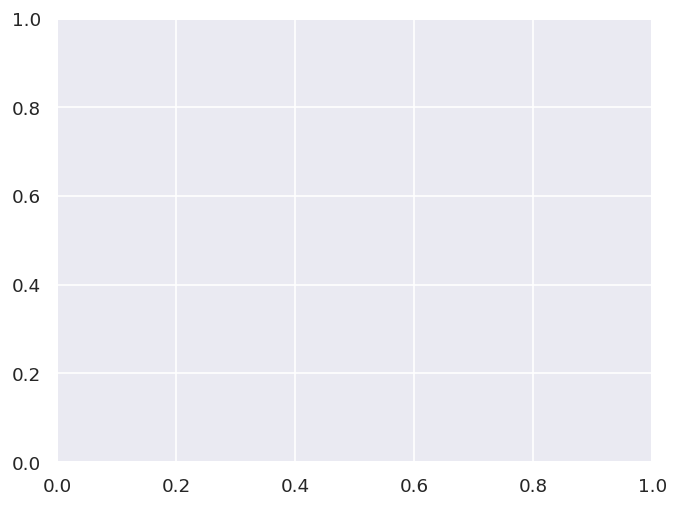

In [4]:
%matplotlib inline
# Example conversion routine
from epsproc.sphCalc import setBLMs
from epsproc.sphFuncs.sphConv import *

# Set a basic distribution of REAL harmonics
BLMre = setBLMs([[0,0,1],[1,1,1],[2,2,1]], kind='real').squeeze(drop=True)

# Convert to complex form
BLMim = sphRealConvert(BLMre)

# Generate complex harmonics
IC = ep.sphCalc(Lmax = 2, res = 50)

# Plot
# CURRENTLY BORKED FOR ALL FORMS
# UPDATE: fixed pl case in ePSproc code, 13/07/23
# MPL version working in Stimpy test build, so looks like MPL version changes?
#  Matplotlib giving empty plot in QM3 build, MPL v3.7.1... not sure why... working fine on Stimpy build, MPL v3.5.1
#  Might be axes 3D issues?

#  Plotly singleton case broken, need to fix source sphPlotPL, see line 863 in sphPlot() - seems to be due to changes in March 2023
#  Matplotlib giving empty plot... not sure why...
backend='mpl'
ItpCSH, fig = ep.sphFromBLMPlot(BLMim, plotFlag = True, backend = backend)  #, pType='a')  #, rc=[1,1], norm='global')


# # Direct Xarray tensor multiplication - this will correctly handle dimensions if names match.
# Iim = BLMim.rename({'BLM':'LM'}).squeeze(drop=True) * IC
# # ep.sphSumPlotX(Irand, facetDim = 't')   # Note this may need facetDim set explicitly here for non-1D cases
# ep.sphSumPlotX(Iim, facetDim=None, backend='pl');

Using complex betas (from BLMX array).


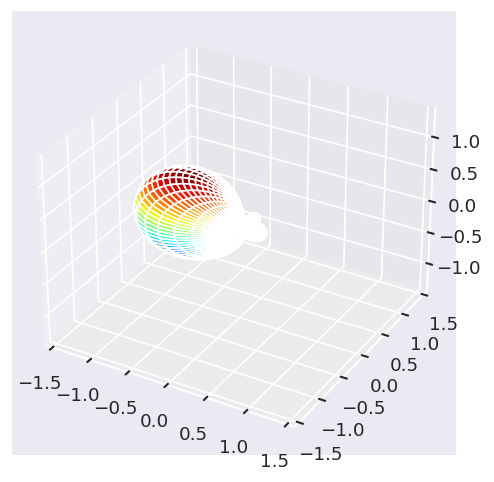

In [5]:
# TESTING MPL VERSION CHANGES

ItpCSH, fig = ep.sphFromBLMPlot(BLMim, plotFlag = False, backend = backend)


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

from epsproc.sphPlot import sphToCart, plotTypeSelector

dataPlot = ItpCSH.sum(dim='LM')
dataPlot = plotTypeSelector(dataPlot, pType = 'a', axisUW = None)

theta, phi = np.meshgrid(dataPlot.Theta, dataPlot.Phi)
convention = 'phys'
    
X, Y, Z = sphToCart(dataPlot, theta, phi, convention = convention)

# Plot in a new figure using Matplotlib
if float(matplotlib.__version__[:-2]) < 3.4:
    fig = plt.figure()
    ax = Axes3D(fig)
else:
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
# ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
# ax.axis('equal') # Not implemented for 3D axes
# Rescale axis to equal, hack from https://stackoverflow.com/questions/8130823/set-matplotlib-3d-plot-aspect-ratio
scaling = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
# ax.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)  # Not quite right - can have lopsided axes for asymmetric distributions.
mRange = np.max([np.abs(np.min(scaling)), np.max(scaling)])
ax.auto_scale_xyz(*[[-mRange, mRange]]*3)

In [28]:
ItpCSH

<xarray.DataArray (LM: 5, Phi: 50, Theta: 50)>
array([[[ 0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j, ...,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j],
        [ 0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j, ...,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j],
        [ 0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j, ...,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j],
        ...,
        [ 0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j, ...,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j],
        [ 0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j, ...,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j],
        [ 0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j, ...,  0.28209479+0.00000000e+00j,
          0.28209479+0.00000000e+00j,  0.28209479+0.00000000e+00j]],

...

       [[ 0.        +0.00000000e+00j,  0.00112123+0.00000000e+00j,
          0.00446649+0.00000000e+00j, ...,  0.00446649+0.00000000e+00j,
          0.00112123+0.00000000e+00j,  0.        +0.00000000e+00j],
        [ 0.        +0.00000000e+00j,  0.00108456+2.84404099e-04j,
          0.00432042+1.13294649e-03j, ...,  0.00432042+1.13294649e-03j,
          0.00108456+2.84404099e-04j,  0.        +0.00000000e+00j],
        [ 0.        +0.00000000e+00j,  0.00097695+5.50205248e-04j,
          0.00389174+2.19178664e-03j, ...,  0.00389174+2.19178664e-03j,
          0.00097695+5.50205248e-04j,  0.        +0.00000000e+00j],
        ...,
        [ 0.        +0.00000000e+00j,  0.00097695-5.50205248e-04j,
          0.00389174-2.19178664e-03j, ...,  0.00389174-2.19178664e-03j,
          0.00097695-5.50205248e-04j,  0.        +0.00000000e+00j],
        [ 0.        +0.00000000e+00j,  0.00108456-2.84404099e-04j,
          0.00432042-1.13294649e-03j, ...,  0.00432042-1.13294649e-03j,
          0.00108456-2.84404099e-04j,  0.        +0.00000000e+00j],
        [ 0.        +0.00000000e+00j,  0.00112123-5.49242303e-19j,
          0.00446649-2.18795067e-18j, ...,  0.00446649-2.18795067e-18j,
          0.00112123-5.49242303e-19j,  0.        +0.00000000e+00j]]])
Coordinates:
  * LM       (LM) MultiIndex
  - l        (LM) int64 0 1 1 2 2
  - m        (LM) int64 0 -1 1 -2 2
  * Phi      (Phi) float64 0.0 0.1282 0.2565 0.3847 ... 5.899 6.027 6.155 6.283
  * Theta    (Theta) float64 0.0 0.06411 0.1282 0.1923 ... 3.013 3.077 3.142
Attributes:
    dataType:   Itp
    long_name:  I(\theta,\phi)
    harmonics:  {'dtype': 'Complex harmonics', 'kind': 'complex', 'normType':...
    units:      arb
    normType:   complex

## Legendre polynomials

Finally, it is of note that Legendre polynomial expansions are also in common use in the description of photoionization obsevables. These are suitable for cylindrically symmetric cases only, and form a subset of the general spherical harmonic case. Using the same notation as Eq. {eq}`eq:AF-PAD-general`, the 1D expansion can be given as:

$$
\bar{I}(\epsilon,t,\theta)=\sum_{L=0}^{2n}\bar{\beta}_{L}(\epsilon,t)P_{L}(\cos(\theta))
$$ (eq:AF-PAD-Lg)

Where $P_{L}(\cos(\theta))$ are Legendre polynomials in $\cos(\theta)$ (equivalently, associated Legendre polynomials $P_{L}^{M=0}(\cos(\theta))$). Note that, since the normalisation is different, care must be taken when comparing associated anisotropy parameters between Legendre polynomial and spherical harmonic expansions. Specifically:

$$
\beta^{Sph}_{L,0} = \sqrt{(2L+1)/4\pi}\beta^{Lg}_{L}
$$ (eq:Lg-Sph-conv)

Where $Sph$ and $Lg$ labels have been added to make explicit that the expansion parameters in the spherical harmonic and Legndre polynomial basis sets respectively.

Herein only spherical harmonic expansions are used, but the {{ ePSproc_full }} does include a conversion routine to convert expansion parameters as required. Again more information can be found in the {{ ePSproc_docs }}, particularly the ["Working with spherical harmonics"](https://epsproc.readthedocs.io/en/dev/special_topics/ePSproc_docs_working_with_spherical_harmonics_200922.html) notebook.

In [ ]:
# Set example BLMs and convert to Lg basis
# Note 'renorm=True' setting to renorm by B0.
# Note also 'harmonics' and 'normType' specifications in output data.

BLMsph = setBLMs([[0,0,1],[1,0,0.5],[2,0,0.8]])
ep.util.conversion.conv_BL_BLM(BLMsph, to = 'lg', renorm = True)

In [ ]:
!date

Quick maths test - see formatting test doc for more details.

$\boldsymbol{\mathbf{E}}$

$\mathbf{E}$

$\boldsymbol{E}$ or $\mathbf{E}$ or $\bm{E}$ should be equivalent.

$$\hat{\Gamma}(\boldsymbol{\mathbf{E}}) = \hat{\mathbf{\mu}}.\boldsymbol{\mathbf{E}}$$

$$\Psi_\mathbf{k}(\bm{r})\equiv\left<\bm{r}|\mathbf{k}\right> = \sum_{lm}Y_{lm}(\mathbf{\hat{k}})\psi_{lm}(\bm{r},k)
\label{eq:elwf}$$

In [ ]:
# Quick PD table render test
setCols = 'l'
inputData = symObj.coeffs['DF']['real'].copy().unstack(level=setCols).fillna('')